# ARIMA example 1

Toy example, for the purpose of using the [Pyramid](http://pyramid-arima.readthedocs.io/en/latest/index.html) package: ARIMA estimators for Python.

## Sales of shampoo over a three-year period

The dataset can be found [here](https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line) (mentioned in [this](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/) great tutorial about ARIMA).

The `.csv` file has 2 columns: `"Month"`, `"Sales of shampoo over a three year period"`. Here is the head of the file:
```
"Month","Sales of shampoo over a three year period"
"1-01",266.0
"1-02",145.9
"1-03",183.1
"1-04",119.3
```

In [1]:
import sys
print("Python version: {}".format(sys.version))
from datetime import datetime

import matplotlib
print("Matplotlib version: {}".format(matplotlib.__version__))
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
print("Numpy version: {}".format(np.__version__))

import pandas as pd
print("Pandas version: {}".format(pd.__version__))

import pyramid
print("Pyramid version: {}".format(pyramid.__version__))
from pyramid.arima import auto_arima  # 0.6.5, pip install pyramid-arima

Python version: 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
Matplotlib version: 2.2.2
Numpy version: 1.14.3
Pandas version: 0.23.0
Pyramid version: 0.6.5


### Loading the data

In [2]:
def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')  # we set an arbitrary year

shampoo = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
shampoo.index.names = ['month']
shampoo = shampoo.rename('sales')

We loaded the file and created a `DatetimeIndex`:

In [3]:
print(type(shampoo.index))
print(shampoo.head())

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
month
1991-01-01    266.0
1991-02-01    145.9
1991-03-01    183.1
1991-04-01    119.3
1991-05-01    180.3
Name: sales, dtype: float64


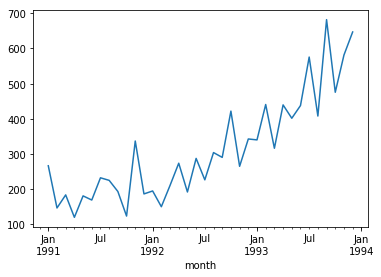

In [4]:
shampoo.plot()

### Predicting future values

We use the first 2 years of the data time span to predict the last 12 months.

In [5]:
month_count = 24
shampoo.values[:month_count]

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3])

In [6]:
stepwise_fit = auto_arima(shampoo.values[:month_count], start_p=1, start_q=1, max_p=5, max_q=3, m=12,
                         start_P=0, seasonal=True, d=1, D=1, trace=True,
                         error_action='ignore',  # don't want to know if an order does not work
                         suppress_warnings=True,  # don't want convergence warnings
                         stepwise=True)  # set to stepwise

print(stepwise_fit.summary())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=147.668, BIC=148.464, Fit time=0.009 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=141.543, BIC=142.737, Fit time=0.070 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=140.037, BIC=141.628, Fit time=0.169 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA:

In [7]:
pred = stepwise_fit.predict(n_periods=36-month_count)
pred

array([320.11115059, 304.57399924, 367.97618087, 445.67672565,
       373.10537887, 480.32054534, 429.92483547, 518.57603793,
       515.72965872, 658.37063113, 512.17298506, 600.89241236])

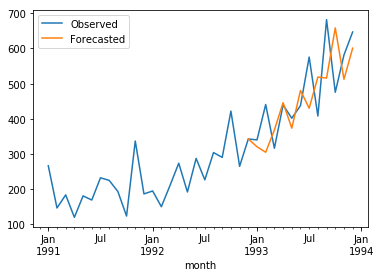

In [8]:
shampoo.plot(label='Observed')
shampoo_pred = shampoo[(month_count-1):].copy(deep=True)
shampoo_pred[1:] = pred
shampoo_pred.plot(label='Forecasted')
plt.legend()

Now let's try to use all the data to predict the next 12 months.

In [9]:
month_count = 36

stepwise_fit = auto_arima(shampoo.values[:month_count], start_p=1, start_q=1, max_p=5, max_q=3, m=12,
                         start_P=0, seasonal=True, d=1, D=1, trace=True,
                         error_action='ignore',  # don't want to know if an order does not work
                         suppress_warnings=True,  # don't want convergence warnings
                         stepwise=True)  # set to stepwise

print(stepwise_fit.summary())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=307.761, BIC=310.032, Fit time=0.008 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=287.966, BIC=292.508, Fit time=0.154 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=288.331, BIC=291.737, Fit time=0.035 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=305.077, BIC=308.483, Fit time=0.128 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=284.983, BIC=290.660, Fit time=0.29

In [10]:
pred = np.zeros(13, dtype=float)
pred[1:13] = stepwise_fit.predict(n_periods=12)
pred[0] = shampoo.values[-1]

In [11]:
pred_index = pd.date_range(start='1993-12', end='1994-12', freq='MS')
pred_series = pd.Series(data=pred, index=pred_index)

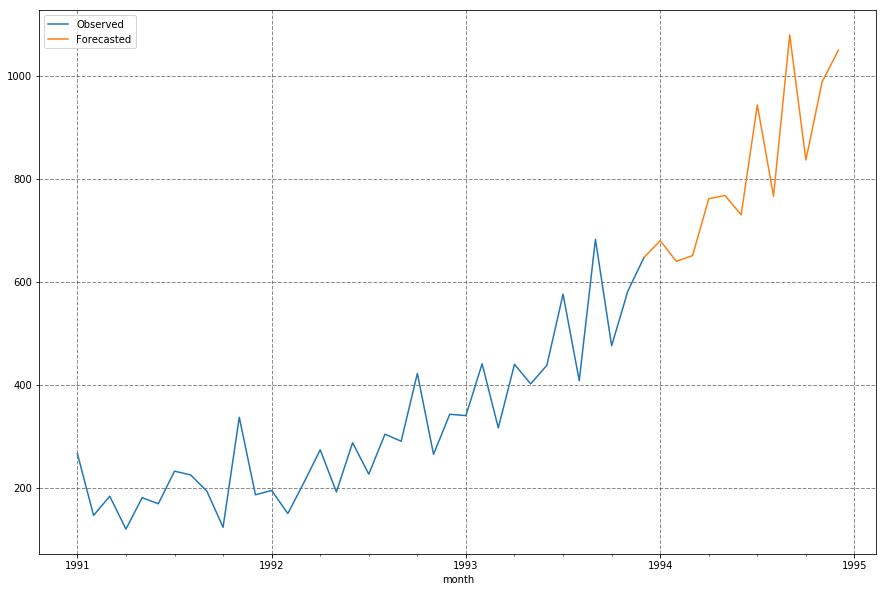

In [12]:
shampoo.plot(label='Observed', figsize=(15,10))
pred_series.plot(label='Forecasted')
ax = plt.gca()
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
plt.legend()